In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
from prophet import Prophet

plt.style.use('bmh')

## 5-min data

In [2]:
data = pd.read_csv('../ts_data/example_yosemite_temps.csv', parse_dates=['ds'])
data 

,ds,y
0,2017-05-01 00:00:00,27.8
1,2017-05-01 00:05:00,27.0
2,2017-05-01 00:10:00,26.8
3,2017-05-01 00:15:00,26.5
4,2017-05-01 00:20:00,25.6
...,...,...
18716,2017-07-04 23:40:00,42.8
18717,2017-07-04 23:45:00,43.0
18718,2017-07-04 23:50:00,42.1
18719,2017-07-04 23:55:00,42.1


In [3]:
data.dtypes

ds    datetime64[ns]
y            float64
dtype: object

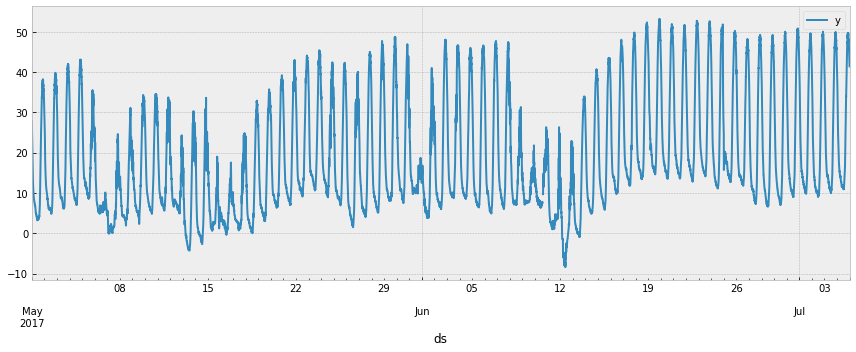

In [4]:
data.plot('ds', 'y', figsize=(12,5))
plt.tight_layout()
plt.show()

In [5]:
m = Prophet(interval_width=0.95)
m.fit(data)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Initial log joint probability = -1444.46


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       32824.7      0.015698       4726.61      0.9069      0.9069      123   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       34094.2      0.105827       1837.35           1           1      238   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       34648.3     0.0049931       1093.17           1           1      361   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       34845.3     0.0184296       563.187      0.7128      0.7128      477   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       34954.2      0.146103        2031.4           1           1      586   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     599     

In [6]:
future = m.make_future_dataframe(5000, freq='5min')
forecast = m.predict(future)

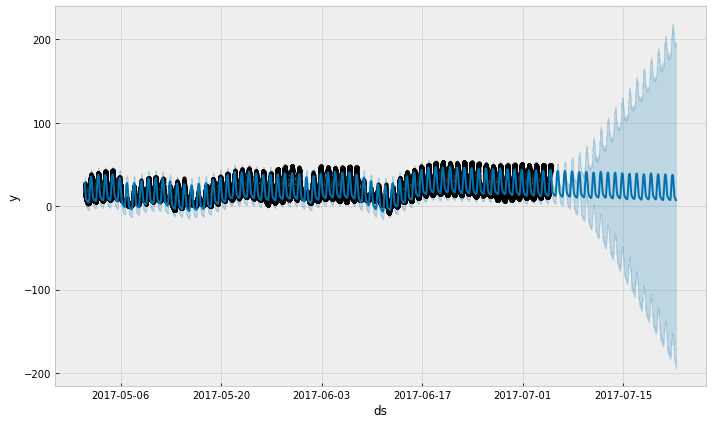

In [7]:
m.plot(forecast);

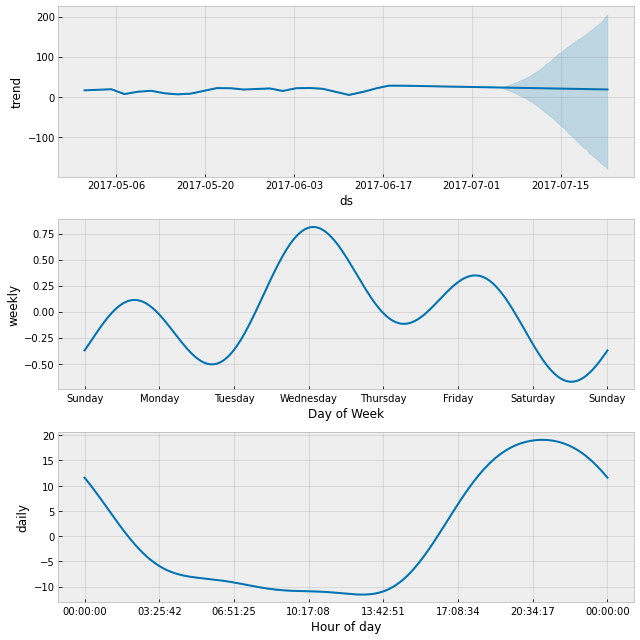

In [8]:
m.plot_components(forecast);

## Data with regular gaps

In [9]:
# make data available only from 0 to 6 AM

data2 = data.copy()
data2['ds'] = pd.to_datetime(data2['ds'])
data2 = data2[data2['ds'].dt.hour < 6]
data2

,ds,y
0,2017-05-01 00:00:00,27.8
1,2017-05-01 00:05:00,27.0
2,2017-05-01 00:10:00,26.8
3,2017-05-01 00:15:00,26.5
4,2017-05-01 00:20:00,25.6
...,...,...
18500,2017-07-04 05:40:00,14.2
18501,2017-07-04 05:45:00,14.2
18502,2017-07-04 05:50:00,14.4
18503,2017-07-04 05:55:00,14.3


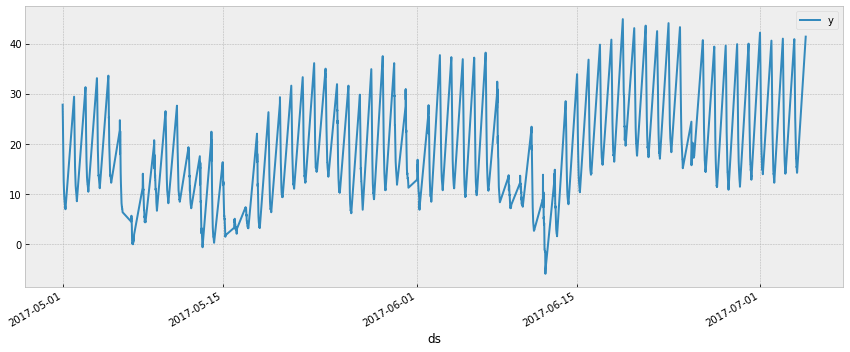

In [10]:
data2.plot('ds', 'y', figsize=(12,5))
plt.tight_layout()
plt.show()

In [11]:
m = Prophet(interval_width=0.95)
m.fit(data2)
future = m.make_future_dataframe(periods=5000, freq='5min')
forecast = m.predict(future)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Initial log joint probability = -467.044
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        8442.7     0.0238798       463.919           1           1      113   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       8714.51    0.00773328       341.865           1           1      219   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299        8815.2     0.0566761       5036.19      0.2003           1      330   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       8913.46     0.0393752       1348.86           1           1      443   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499        8952.4    0.00452627        374.99           1           1      553   
    Iter      log prob        ||dx||      ||grad||       alpha  

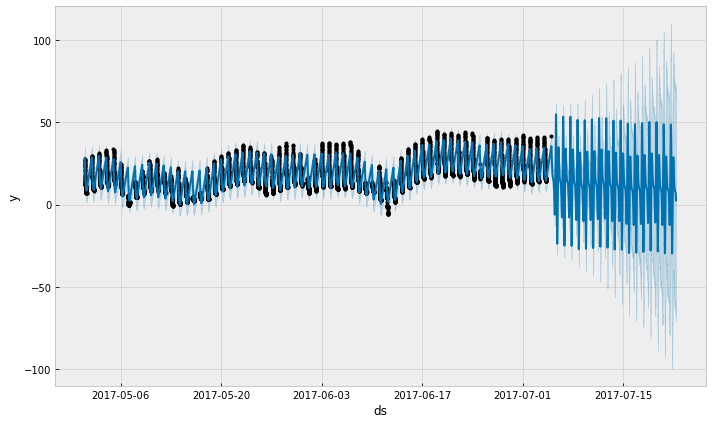

In [12]:
# forecast doesn't look good

m.plot(forecast);

In [13]:
# better forecast only 0 to 6 AM
future2 = future.copy()
future2 = future2[future2['ds'].dt.hour < 6]
forecast2 = m.predict(future2)

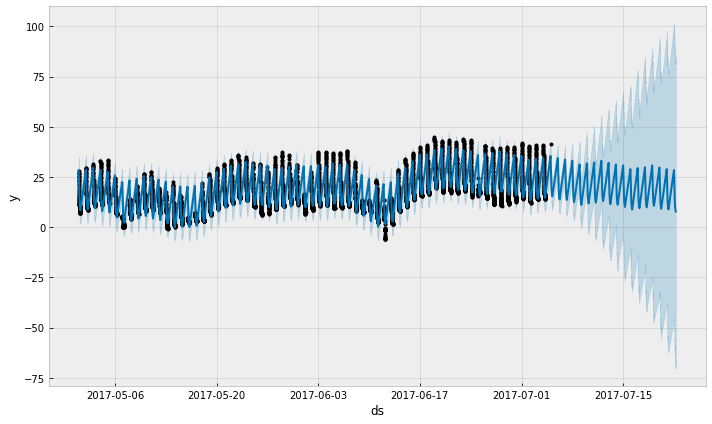

In [14]:
m.plot(forecast2);

## Monthly Data

In [15]:
data = pd.read_csv('../ts_data/example_retail_sales.csv', parse_dates=['ds'])
data 

,ds,y
0,1992-01-01,146376
1,1992-02-01,147079
2,1992-03-01,159336
3,1992-04-01,163669
4,1992-05-01,170068
...,...,...
288,2016-01-01,400928
289,2016-02-01,413554
290,2016-03-01,460093
291,2016-04-01,450935


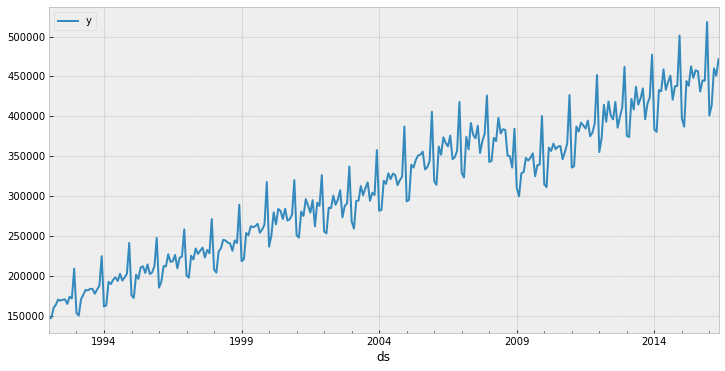

In [16]:
data.plot('ds', 'y', figsize=(12,6));

In [17]:
m = Prophet(seasonality_mode='multiplicative', interval_width=0.95)
m.fit(data)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -2.41173


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1024.49    0.00481017       132.254      0.6149      0.6149      121   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       1045.34      0.004967       303.146      0.3599           1      239   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       1050.61    0.00212421       139.432           1           1      365   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     371       1056.77   3.85333e-05       98.7229   2.134e-07       0.001      483  LS failed, Hessian reset 
     399       1060.17    0.00413289       120.884           1           1      525   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       1064.08   0.000161313       99.4391       0.223      0.8574      6

In [18]:
# only predict monthly if data is monthly

future = m.make_future_dataframe(periods=100, freq='MS')
forecast = m.predict(future)

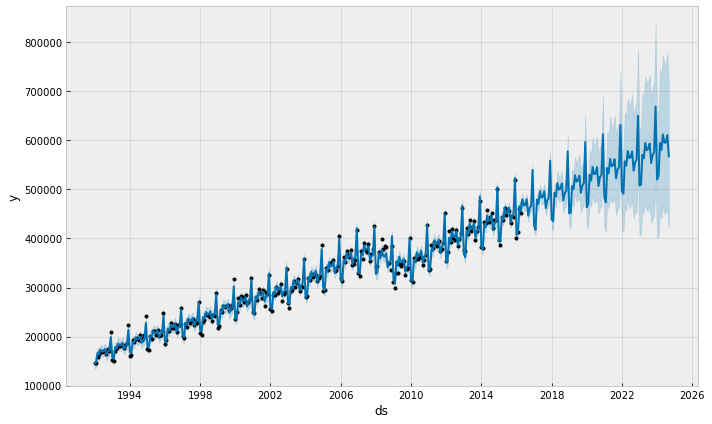

In [19]:
m.plot(forecast);

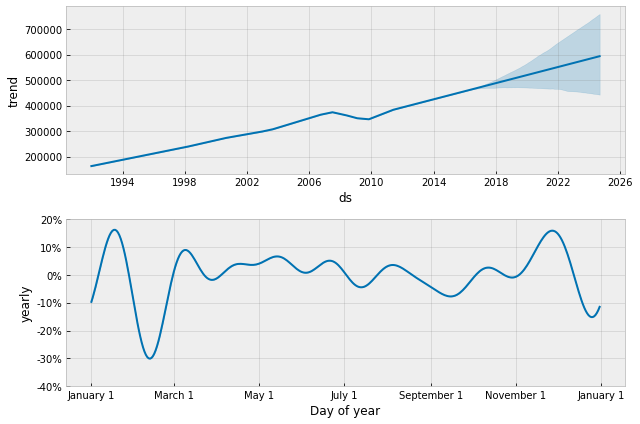

In [20]:
m.plot_components(forecast);